<a href="https://colab.research.google.com/github/luisam19/course_optimizacion/blob/main/Taller01_optimizaci%C3%B3n_LuisaMariaZapataSaldarriaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerías

In [4]:
#Instalemos primero los paquetes que necesitamos
!pip install -q amplpy pandas
from amplpy import AMPL, tools


In [ ]:
# install pyomo and import libraries
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *

## instal cbc
!apt-get install -y -qq coinor-cbc
# Set the solver
solver = solvers.SolverFactory('cbc', executable='/usr/bin/cbc')


#Acceso a pandas
import pandas as pd

## Ejercicio 1

## Problema 1

Para el ejemplo introductorio de la clase relacionado con la carga de contenedores. En el cual se busca decidir cuales contenedores usar y que ítems asignar a cada contenedor, cumpliendo con la carga máxima admisible de cada contenedor utilizado y que cada objeto se asigna exactamente a un contenedor para minimizar el número de contenedores utilizados.

|   Ítem| Peso (kg) |Ítem| Peso (kg) |Ítem| Peso (kg) |Ítem| Peso (kg) |
|-------|----|-------|----|-------|----|-------|----|
| **1** | 36 | **6** | 19 | **11** | 23 | **16** | 33 |
| **2** | 33  | **7** | 37  | **12** | 29  | **17** | 9 |
| **3** | 39	| **8** | 8	| **13** | 10	| **18** | 17	|
| **4** | 43| **9** | 29 | **14** | 22 |**19** | 30 |
| **5** | 7	| **10** | 37	| **15** | 11	| **20** | 28	|


In [ ]:
from pyomo.environ import *

# Crear un modelo concreto para el Caso 1
modelo_caso1 = ConcreteModel()

# Conjuntos
modelo_caso1.I = Set(initialize=range(1, 21))
modelo_caso1.C = Set(initialize=['c1', 'c2', 'c3', 'c4', 'c5','c6'])

# Parámetros
pesos = {i: [36, 33, 39, 43, 7, 19, 23, 33, 37, 29, 10, 37, 11, 22, 28, 19, 9, 17, 30, 28][i-1] for i in range(1, 21)}
capacidad_maxima = 100

# Variables de decisión
modelo_caso1.X = Var(modelo_caso1.I, modelo_caso1.C, within=Binary)
modelo_caso1.Y = Var(modelo_caso1.C, within=Binary)

# Restricciones
def restriccion_recursos(modelo, c):
    return sum(modelo.X[i, c] * pesos[i] for i in modelo.I) <= capacidad_maxima * modelo.Y[c]
modelo_caso1.restriccion_recursos = Constraint(modelo_caso1.C, rule=restriccion_recursos)

def restriccion_asignacion(modelo, i):
    return sum(modelo.X[i, c] for c in modelo.C) == 1
modelo_caso1.restriccion_asignacion = Constraint(modelo_caso1.I, rule=restriccion_asignacion)

# Función objetivo
def objetivo_caso1(modelo):
    return sum(modelo.Y[c] for c in modelo.C)
modelo_caso1.objetivo = Objective(rule=objetivo_caso1, sense=minimize)

# Resolver el modelo
result_caso1 = solver.solve(modelo_caso1)

# Imprimir resultados
print("Resultados del Caso 1:")
for c in modelo_caso1.C:
    if value(modelo_caso1.Y[c]) > 0:
        print("Contenedor {}: Se utiliza".format(c))
        for i in modelo_caso1.I:
            if value(modelo_caso1.X[i, c]) > 0:
                print("  Ítem {}: Peso {}".format(i, pesos[i]))
print("Número total de contenedores utilizados:", value(modelo_caso1.objetivo))


Resultados del Caso 1:
Contenedor c1: Se utiliza
  Ítem 5: Peso 7
  Ítem 11: Peso 10
  Ítem 13: Peso 11
  Ítem 17: Peso 9
  Ítem 18: Peso 17
  Ítem 20: Peso 28
Contenedor c2: Se utiliza
  Ítem 9: Peso 37
  Ítem 12: Peso 37
  Ítem 16: Peso 19
Contenedor c3: Se utiliza
  Ítem 2: Peso 33
  Ítem 8: Peso 33
  Ítem 19: Peso 30
Contenedor c4: Se utiliza
  Ítem 7: Peso 23
  Ítem 14: Peso 22
  Ítem 15: Peso 28
Contenedor c5: Se utiliza
  Ítem 1: Peso 36
  Ítem 6: Peso 19
  Ítem 10: Peso 29
Contenedor c6: Se utiliza
  Ítem 3: Peso 39
  Ítem 4: Peso 43
Número total de contenedores utilizados: 6.0


In [ ]:
from pyomo.environ import *

# Crear un modelo concreto para el Caso 2
modelo_caso2 = ConcreteModel()

# Conjuntos
modelo_caso2.I = Set(initialize=range(1, 21))
modelo_caso2.C = Set(initialize=['c1', 'c2', 'c3', 'c4', 'c5','c6'])

# Parámetros
pesos = {i: [36, 33, 39, 43, 7, 19, 23, 33, 37, 29, 10, 37, 11, 22, 28, 19, 9, 17, 30, 28][i-1] for i in range(1, 21)}
capacidad_maxima = 100

# Variables de decisión
modelo_caso2.X = Var(modelo_caso2.I, modelo_caso2.C, within=Binary)
modelo_caso2.Y = Var(modelo_caso2.C, within=Binary)
modelo_caso2.max_carga = Var(within=NonNegativeReals)

# Restricciones
def restriccion_recursos(modelo, c):
    return sum(modelo.X[i, c] * pesos[i] for i in modelo.I) <= capacidad_maxima * modelo.Y[c]
modelo_caso2.restriccion_recursos = Constraint(modelo_caso2.C, rule=restriccion_recursos)

def restriccion_asignacion(modelo, i):
    return sum(modelo.X[i, c] for c in modelo.C) == 1
modelo_caso2.restriccion_asignacion = Constraint(modelo_caso2.I, rule=restriccion_asignacion)

def max_carga_rule(modelo, c):
    return modelo.max_carga >= sum(pesos[i] * modelo.X[i, c] for i in modelo.I)
modelo_caso2.max_carga_constraint = Constraint(modelo_caso2.C, rule=max_carga_rule)

# Función objetivo auxiliar para maximizar la carga total de los contenedores
def objetivo_caso2_aux(modelo):
    return sum(pesos[i] * modelo.X[i, c] for i in modelo.I for c in modelo.C)

modelo_caso2.objetivo_aux = Objective(rule=objetivo_caso2_aux, sense=maximize)

# Función objetivo para minimizar la carga máxima entre los contenedores
def objetivo_caso2(modelo):
    return modelo.max_carga
modelo_caso2.objetivo = Objective(rule=objetivo_caso2, sense=minimize)

# Desactivar el objetivo auxiliar
modelo_caso2.objetivo_aux.deactivate()

# Resolver el modelo
result_caso2 = solver.solve(modelo_caso2)

# Imprimir resultados
print("Resultados del Caso 2:")
for c in modelo_caso2.C:
    if value(modelo_caso2.Y[c]) > 0:
        print("Contenedor {}: Se utiliza".format(c))
        for i in modelo_caso2.I:
            if value(modelo_caso2.X[i, c]) > 0:
                print("  Ítem {}: Peso {}".format(i, pesos[i]))
print("Carga máxima de un contenedor:", value(modelo_caso2.max_carga))


Resultados del Caso 2:
Contenedor c1: Se utiliza
  Ítem 3: Peso 39
  Ítem 10: Peso 29
  Ítem 18: Peso 17
Contenedor c2: Se utiliza
  Ítem 4: Peso 43
  Ítem 8: Peso 33
  Ítem 17: Peso 9
Contenedor c3: Se utiliza
  Ítem 5: Peso 7
  Ítem 14: Peso 22
  Ítem 15: Peso 28
  Ítem 20: Peso 28
Contenedor c4: Se utiliza
  Ítem 2: Peso 33
  Ítem 7: Peso 23
  Ítem 11: Peso 10
  Ítem 16: Peso 19
Contenedor c5: Se utiliza
  Ítem 9: Peso 37
  Ítem 12: Peso 37
  Ítem 13: Peso 11
Contenedor c6: Se utiliza
  Ítem 1: Peso 36
  Ítem 6: Peso 19
  Ítem 19: Peso 30
Carga máxima de un contenedor: 85.0


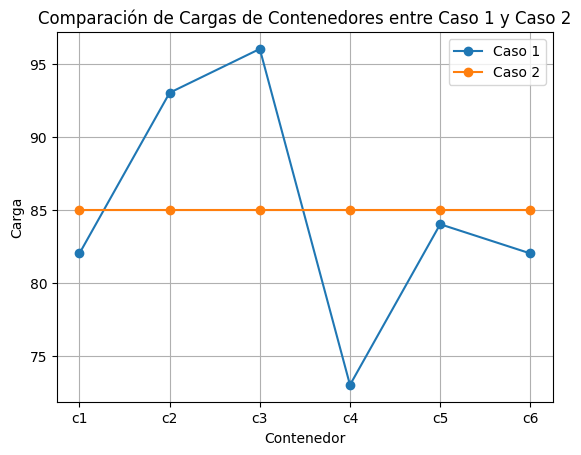

In [ ]:
import matplotlib.pyplot as plt

# Obtener los contenedores y las cargas del caso 1
contenedores_caso1 = [c for c in modelo_caso1.C if value(modelo_caso1.Y[c]) > 0]
cargas_caso1 = [sum(pesos[i] * value(modelo_caso1.X[i, c]) for i in modelo_caso1.I) for c in contenedores_caso1]

# Obtener los contenedores y las cargas del caso 2
contenedores_caso2 = [c for c in modelo_caso2.C if value(modelo_caso2.Y[c]) > 0]
cargas_caso2 = [sum(pesos[i] * value(modelo_caso2.X[i, c]) for i in modelo_caso2.I) for c in contenedores_caso2]


# Agregar un contenedor adicional si una lista es más corta que la otra
if len(contenedores_caso1) > len(contenedores_caso2):
    contenedores_caso2.append('c{}'.format(len(contenedores_caso2) + 1))
    cargas_caso2.append(0)  # Añadir una carga de 0 al contenedor nuevo
elif len(contenedores_caso2) > len(contenedores_caso1):
    contenedores_caso1.append('c{}'.format(len(contenedores_caso1) + 1))
    cargas_caso1.append(0)  # Añadir una carga de 0 al contenedor nuevo

import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las cargas de los contenedores del caso 1
ax.plot(contenedores_caso1, cargas_caso1, marker='o', label='Caso 1')

# Graficar las cargas de los contenedores del caso 2
ax.plot(contenedores_caso2, cargas_caso2, marker='o', label='Caso 2')

# Etiquetas y título
ax.set_xlabel('Contenedor')
ax.set_ylabel('Carga')
ax.set_title('Comparación de Cargas de Contenedores entre Caso 1 y Caso 2')

# Mostrar la leyenda
ax.legend()
ax.grid()

# Mostrar la gráfica
plt.show()



## Ejercicio 2

In [41]:
%%ampl_eval
reset;
# Define sets
set F;  # Set of manufacturing plants
set E;  # Set of assembly plants
set R;  # Set of regions
set T;  # Set of planning periods
set S;  # Set of sub-assemblies

# Parameters
param dem{T, R};    # Demand by region and period
param cfe{F, E};   # Transportation costs of sub-assemblies
param cer{E, R};   # Transportation costs from assembly to region
param hft{F};      # Machine hours available in manufacturing plants
param hmax{E};     # Man hours available in assembly plants
param cex;      # Additional cost per man hour in overtime in assembly plants
param m{S};        # Inventory holding cost per unit for sub-assemblies
param mp;       # Inventory holding cost per unit for finished product
param req{S};        # Required production hours to manufacture a sub-assembly
param A{F,S};      # Indicates whether it can be done or not
param inise;       # Initial inventory of sub-assemblies
param inipt;       # Initial inventory of finished product
param cpt;
param A_default{F,S} default 0;
param A_specific{F,S} default 0;

# Decision Variables
# Production
var X{F, T, S} >= 0;   # Amount of sub-assemblies manufactured in each manufacturing plant and period
var Y{E, T} >= 0;      # Amount of finished product shipped from each assembly plant to each region and period
var U{E, T} >= 0;      # Extra hours used in assembly plants

# Transportation
var W{S,F,E,T} >= 0;
var Z{E, R, T} >= 0;

# Inventory
var P{S,F,T} >= 0;     # Total amount of finished product stored in all assembly plants for each period
var Q{E,T} >= 0;     # Total amount of finished product stored in all assembly plants for each period

# #Objective Function
minimize TotalCost:
    sum {e in E, t in T} (cpt * Y[e, t]) +
    sum {e in E, t in T} (cex* U[e,t]) +
    sum {f in F, e in E, s in S, t in T} (cfe[f, e] * W[s, f, e, t]) +
    sum {e in E, r in R, t in T}(cer[e,r]*  Z[e,r,t])+
    sum {s in S, f in F, t in T} (m[s] * P[s,f,t]) +
    sum {e in E, t in T} (mp * Q[e, t]);

subject to Production_Capacity {f in F, t in T}:
  sum {s in S} A_specific[f,s] * req[s] * X[f,t,s] <= hft[f];

subject to DemandSatisfied {r in R, t in T}:
  sum {e in E} Z[e, r, t] >= dem[t, r];

subject to Assembly_Plant_Capacity {e in E, t in T}:
    2 * Y[e, t] <= hmax[e] + U[e, t];

# Ecuación de balance de inventario de los sub-ensambles en cada planta de fabricación en cada periodo
subject to Subassembly_Inventory_Balance {s in S, f in F, t in T : t>2}:
  P[s,f,t] = P[s,f,t-1] + X[f,t,s] - sum {e in E} W[s,f,e,t];

subject to Subassembly_Inventory_Balance_init {s in S, f in F}:
  P[s,f,1] =inise + X[f,1,s] - sum {e in E} W[s,f,e,1];

subject to Finished_Product_Inventory_Balance {e in E, t in T : t > 2}:
  Q[e,t] = Q[e,t-1] + Y[e,t] - sum {r in R} Z[e, r, t];

subject to Finished_Product_Inventory_Balance_init {e in E}:
  Q[e,1] = inipt + Y[e,1] - sum {r in R} Z[e, r, 1];




In [43]:
# Definir conjuntos
ampl.set['F'] = ['f1', 'f2', 'f3']
ampl.set['E'] = ['e1', 'e2']
ampl.set['S'] = ['SA', 'SB', 'SC']
ampl.set['R'] = ['r1', 'r2', 'r3', 'r4']
ampl.set['T'] = [1, 2, 3]

# Tabla 1: Demanda por región y período
demanda_data = {
    (1, 'r1'): 1000, (1, 'r2'): 1500, (1, 'r3'): 800, (1, 'r4'): 2000,
    (2, 'r1'): 1200, (2, 'r2'): 1500, (2, 'r3'): 800, (2, 'r4'): 2500,
    (3, 'r1'): 1350, (3, 'r2'): 1750, (3, 'r3'): 1000, (3, 'r4'): 3000
}
ampl.param['dem'] = demanda_data

# Tabla 2: Costos de transporte de sub-ensambles
cfe_data = {
    ('f1', 'e1'): 1.80, ('f1', 'e2'): 2.20,
    ('f2', 'e1'): 2.90, ('f2', 'e2'): 0.60,
    ('f3', 'e1'): 1.50, ('f3', 'e2'): 2.25
}
ampl.param['cfe'] = cfe_data

# Tabla 3: Costos de transporte de ensamble a región
cer_data = {
    ('e1', 'r1'): 1.10, ('e1', 'r2'): 2.15, ('e1', 'r3'): 5.40, ('e1', 'r4'): 6.10,
    ('e2', 'r1'): 7.15, ('e2', 'r2'): 6.70, ('e2', 'r3'): 4.50, ('e2', 'r4'): 2.15
}
ampl.param['cer'] = cer_data

# Tabla 4: Horas máquina disponibles en plantas de fabricación
hft_data = {'f1': 15000, 'f2': 42000, 'f3': 25000}
ampl.param['hft'] = hft_data

# Tabla 5: Horas hombre disponibles en plantas de ensamble
hmax_data = {'e1': 5000, 'e2': 6000}
ampl.param['hmax'] = hmax_data

# Tabla 6: Costo de mantener inventario por unidad para subensambles
m_data = {'SA': 1.20, 'SB': 0.90, 'SC': 1.50}
ampl.param['m'] = m_data

# Tabla 7: Horas de producción requeridas para fabricar un sub-ensambles
r_data = {'SA': 3, 'SB': 4.5, 'SC': 2}
ampl.param['req'] = r_data

# Costo adicional por hora hombre en tiempo extra en plantas de ensamble
ampl.param['cex'] = 62.5

ampl.param['cpt'] = 50
ampl.param['mp'] = 7.40
ampl.param['inipt']=0
ampl.param['inise']=0

#
# Resolver el modelo
ampl.option["solver"] = "highs"
ampl.solve()

# Mostrar resultados
print(ampl.getObjective('TotalCost').value())

HiGHS 1.7.0: HiGHS 1.7.0: optimal solution; objective 359482.5
4 simplex iterations
0 barrier iterations
359482.5


## Ejercicio 3

El Instituto de Cancerología de una prestigiosa clínica colombiana le ha contratado como consultor para que desarrolle un sistema de apoyo a las decisiones con el cual los médicos puedan diseñar los tratamientos de radioterapia de sus pacientes.  “La Radioterapia es un tipo de tratamiento oncológico que utiliza las radiaciones para eliminar las células tumorales, (generalmente cancerosas), en la parte del organismo donde se apliquen. La radiación utilizada puede ser de rayos gamma, rayos X o electrones. La radioterapia actúa sobre el tumor, destruyendo las células malignas, para impedir que crezcan y se reproduzcan. En este tipo de tratamiento, los pacientes acuden diariamente de forma ambulatoria por un período de tiempo variable, dependiendo de la enfermedad que se esté tratando.


Para eliminar un tumor es necesario irradiar todas sus partes procurando no afectar tejido sano (en color blanco en la Figura 2), sin embargo, algunas veces es inevitable. El tratamiento con radioterapia es costoso, tiene una alta demanda y es incómodo para los pacientes, lo cual hace atractivos los tratamientos que toman poco tiempo.

En este caso, el equipo utilizado permite hacer dos tipos diferentes de irradiaciones, la primera (Figura 1-T1) tiene un rayo concentrado de cubrimiento pequeño mientras que la segunda (Figura 1-T2) es capaz de irradiar áreas mayores.  La precisión de una irradiación T1 hace que su preparación y ejecución tome el doble del tiempo que para una irradiación T2.  Asuma que las irradiaciones T2 toman una unidad de tiempo.

Cuando se planea el tratamiento es necesario que los médicos tengan varias alternativas para escoger, analizando la cantidad de tejido sano irradiado y la duración del tratamiento.
Para probar sus prototipos del sistema los médicos le han entregado la imagen de un tumor bastante raro y difícil de tratar (Figura 2), para el cual usted debe diseñar tratamientos que minimicen el tejido sano irradiado. En particular se quieren tratamiento que duren como máximo 15 o 20 unidades de tiempo.

Usted ha decidido abordar esta situación utilizando sus conocimientos de optimización. Para lo cual usted deberá: formular un modelo de optimización general que describa la situación, e implementar dicho modelo en un software de optimización y probar su método utilizando el tumor de la Figura 2.


In [ ]:
# install pyomo and import libraries
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *
import os


# Establecer NEOS  como servicio para el solucionador
solver_manager = SolverManagerFactory('neos')
# Una dirección valida para ejecutar NEOS
os.environ['NEOS_EMAIL'] = 'luisa.zapatas@udea.edu.co' #Ponga su dirección de correo para una ejecución y visualización correcta de los resultados


In [45]:
# Install Pyomo and import libraries
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *
import os

# Set up NEOS as the solver service
solver_manager = SolverManagerFactory('neos')

# A valid email address for NEOS execution
os.environ['NEOS_EMAIL'] = 'juan.villegas@udea.edu.co'  # Please use your email address for correct execution and result visualization

# Create the abstract model
model = AbstractModel()

# Sets
model.T = Set()  # Tipos de irradiación
model.C = Set()  # Celdas

# Parameters
model.a = Param(model.C, within=Binary)  # Presencia o ausencia de área afectada en la celda
model.tipo2 = Param(model.C)  # Lista de celdas que irradiando con el disparo t2 cubren la celda
model.us = Param(model.T)  # Unidad de tiempo del tipo de irradiación
model.umax = Param(within=NonNegativeReals)  # Unidades de tiempo máximo de irradiación
model.sano = Param(model.C)  # Conteo de tejido sano

# Decision Variables
model.X = Var(model.T, model.C, within=Binary)  # Variable binaria que indica si se selecciona el tipo de irradiación en la celda

# Objective Function
def objective_rule(model):
    return sum(model.sano[c] * model.X[t, c] for t in model.T for c in model.C)

model.obj = Objective(rule=objective_rule, sense=minimize)

# Constraints
def irradiacion_celdas_rule(model, c):
    if model.a[c] == 1:
        return model.X['t1', c] + sum(model.X['t2', cc] for cc in model.tipo2[c]) >= 1
    else:
        return Constraint.Skip

model.irradiacion_celdas = Constraint(model.C, rule=irradiacion_celdas_rule)

model.unidades_tiempo = Constraint(expr=sum(model.us[t] * sum(model.X[t, c] for c in model.C) for t in model.T) <= model.umax)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00


RuntimeError: Cannot iterate over AbstractOrderedScalarSet 'T' before it has been constructed (initialized): '__iter__' is an attribute on an Abstract component and cannot be accessed until the component has been fully constructed (converted to a Concrete component) using AbstractModel.create_instance() or T.construct().